# 1. Import essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Get the data

In [2]:
train = pd.read_csv('playground-series-s3e1/train.csv')
test = pd.read_csv('playground-series-s3e1/test.csv')
sample = pd.read_csv('playground-series-s3e1/sample_submission.csv')

* check the datas

In [3]:
train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
test.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [5]:
sample.head()

,id,MedHouseVal
0,37137,2.079751
1,37138,2.079751
2,37139,2.079751
3,37140,2.079751
4,37141,2.079751


* get the info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24759 non-null  int64  
 1   MedInc      24759 non-null  float64
 2   HouseAge    24759 non-null  float64
 3   AveRooms    24759 non-null  float64
 4   AveBedrms   24759 non-null  float64
 5   Population  24759 non-null  float64
 6   AveOccup    24759 non-null  float64
 7   Latitude    24759 non-null  float64
 8   Longitude   24759 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


* get the statistical description

In [8]:
train.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [9]:
test.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000
mean,49516.000000,3.832618,26.041561,5.168789,1.063599,1679.327548,2.830808,35.598007,-119.570208
std,7147.451994,1.797503,12.177907,1.252874,0.123630,1365.598976,1.615320,2.097787,1.977200
min,37137.000000,0.499900,2.000000,1.000000,0.560000,3.000000,0.764706,32.550000,-124.230000
25%,43326.500000,2.590150,17.000000,4.356443,1.020460,955.000000,2.400000,33.930000,-121.800000
50%,49516.000000,3.504600,25.000000,5.077143,1.054094,1398.000000,2.751592,34.200000,-118.460000
75%,55705.500000,4.687500,35.000000,5.858646,1.088295,1874.000000,3.129167,37.720000,-118.020000
max,61895.000000,15.000100,52.000000,56.269231,10.500000,35682.000000,230.172414,41.950000,-114.550000


* check of null values

In [10]:
train.isna().sum().sort_values(ascending=False)

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
test.isna().sum().sort_values(ascending=False)

id            0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [12]:
sample.isna().sum().sort_values(ascending=False)

id             0
MedHouseVal    0
dtype: int64

* get the size

In [14]:
len(train), len(test), len(sample)

(37137, 24759, 24759)

In [17]:
x = [5, 18, 15, 7, 23, 220, 130, 85, 103, 25, 80, 7, 24, 6, 13, 65, 37, 25, 24, 65, 82, 95, 77, 15, 70,
110, 44, 28, 33, 81, 29, 14, 45, 92, 17, 53]
pd.Series(x).mean()

51.72222222222222

In [18]:
import statistics as stat

stat.variance(x)

2021.4634920634921

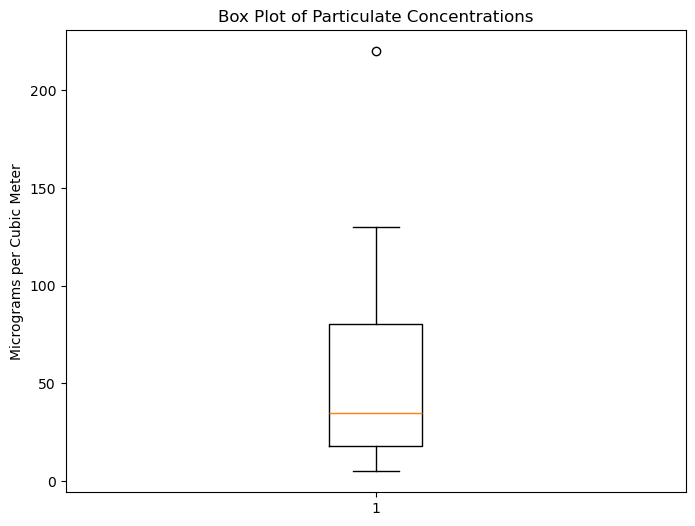

In [19]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(x)
plt.title('Box Plot of Particulate Concentrations')
plt.ylabel('Micrograms per Cubic Meter')
plt.show()

In [20]:
print(25*24*23*22*21*20)

127512000
